In [126]:
import pandas as pd
import numpy as np
import time
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [58]:
df = pd.read_excel("german_credit_data.xlsx")
df['Label'] = (df.Risk == 'good').astype(int)
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Label
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,0
2,2,49,male,1,own,little,NaN,2096,12,education,good,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1
4,4,53,male,2,free,little,little,4870,24,car,bad,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,1
996,996,40,male,3,own,little,little,3857,30,car,good,1
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good,1
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad,0


In [19]:
df.Risk.value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [27]:
df.loc[df['Sex']=='female'].Risk.value_counts()

good    201
bad     109
Name: Risk, dtype: int64

In [80]:
df.loc[(df['Sex']=='male') & (df['Housing']=='own')].Risk.value_counts()

good    390
bad     127
Name: Risk, dtype: int64

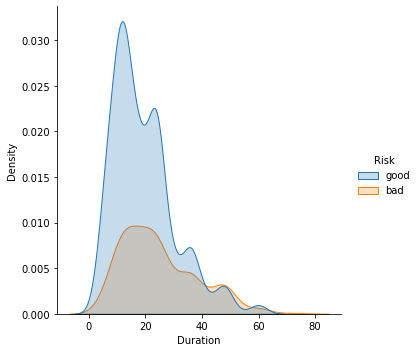

In [81]:
import seaborn as sns
sns.displot(df, x="Duration", hue="Risk", kind="kde", fill=True)

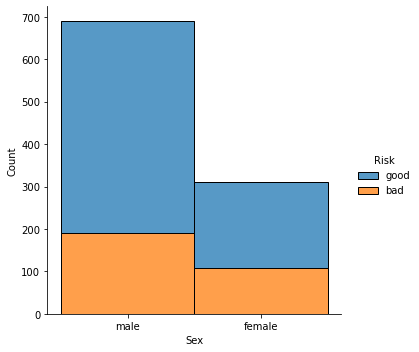

In [89]:
sns.displot(df, x="Sex", hue="Risk",multiple="stack")

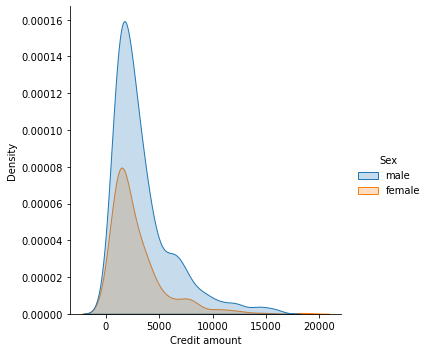

In [91]:
sns.displot(df, x="Credit amount", hue="Sex", kind="kde", fill=True)

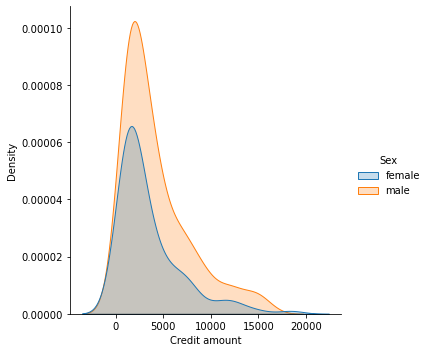

In [97]:
sns.displot(df.loc[df.Risk=="bad"], x="Credit amount", hue="Sex", kind="kde", fill=True)

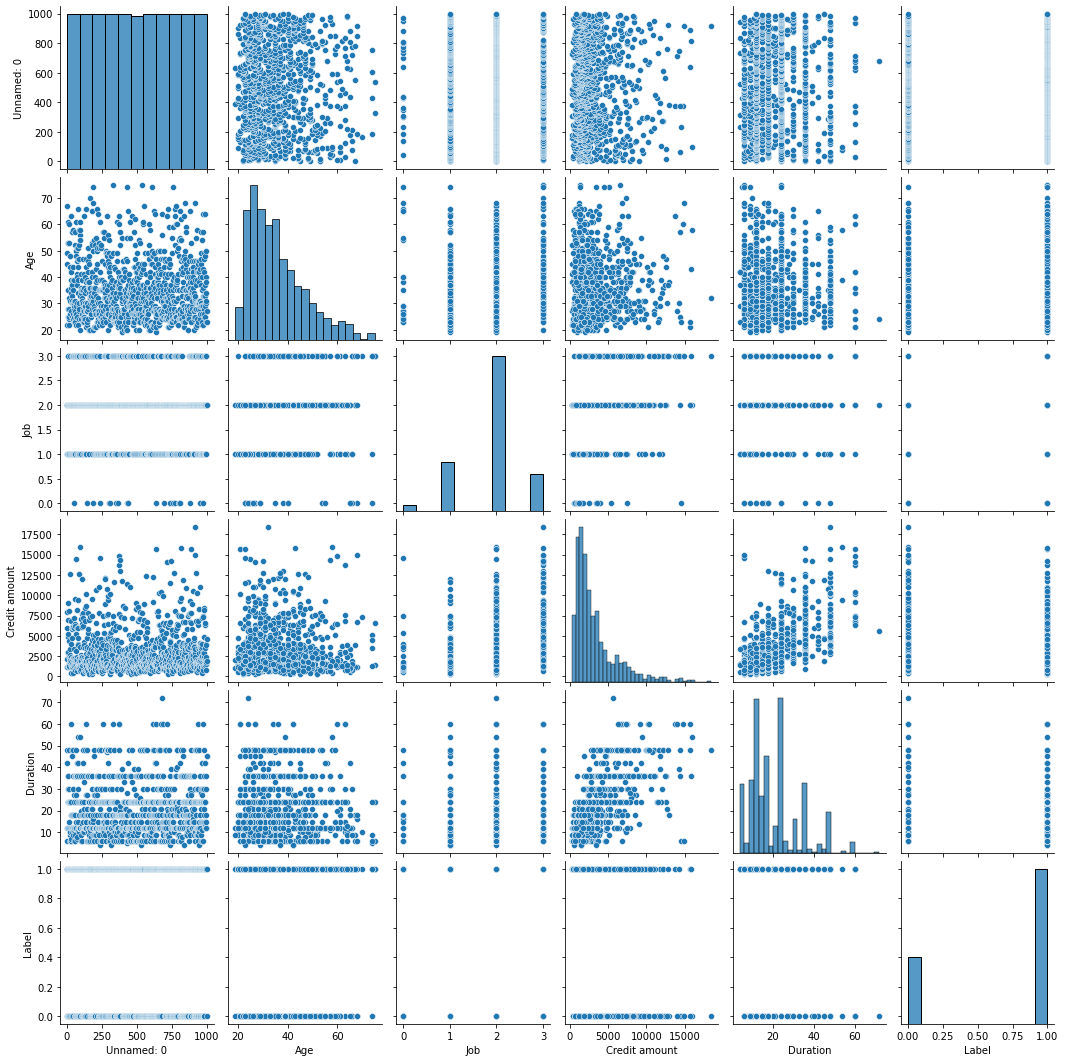

In [88]:
sns.pairplot(df)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
 11  Label             1000 non-null   int32 
dtypes: int32(1), int64(5), object(6)
memory usage: 90.0+ KB


Create test and train set

In [64]:
df_train,df_test = train_test_split(df,test_size=0.3,random_state=42)

In [137]:
#df_test_bs1 = 
list_id_female = list(df_test.loc[(df.Risk=="good")&(df.Sex=='female')]['Unnamed: 0'])
bs_samples_female = random.sample(list_id_female,10)
list_id_male = list(df_test.loc[(df.Risk=="bad")&(df.Sex=='male')]['Unnamed: 0'])
bs_samples_male = random.sample(list_id_male,10)

df_test_bs1 = df_test.append(df_test.loc[bs_samples_female])
df_test_bs1 = df_test_bs1.append(df_test.loc[bs_samples_male])

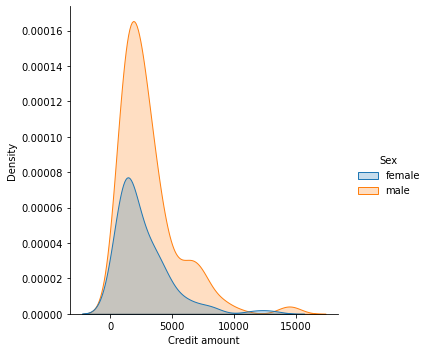

In [138]:
sns.displot(df_test_bs1, x="Credit amount", hue="Sex", kind="kde", fill=True)

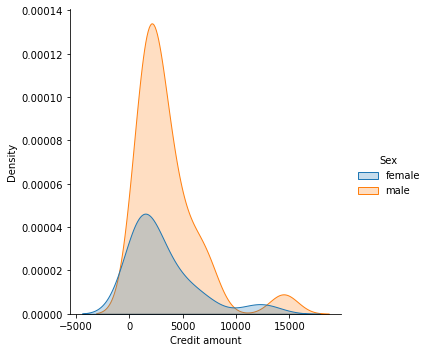

In [141]:
sns.displot(df_test_bs1.loc[df.Risk=="bad"], x="Credit amount", hue="Sex", kind="kde", fill=True)

In [67]:
#X1 includes protected attribute 'Sex', X2 does not include protected attribute 'Sex'
X1_train = df_train[['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose']].copy()
X2_train = df_train[['Age','Job','Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose']].copy()
y_train = df_train.Label.copy()

X1_test = df_test[['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose']].copy()
X2_test = df_test[['Age','Job','Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose']].copy()
y_test = df_test.Label.copy()

X1_train = pd.get_dummies(X1_train)
X2_train = pd.get_dummies(X2_train)
X1_test = pd.get_dummies(X1_test)
X2_test = pd.get_dummies(X2_test)

In [90]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0,max_iter=1000).fit(X1_train, y_train)
clf2 = LogisticRegression(random_state=0,max_iter=1000).fit(X2_train,y_train)

print("Train R2-score including Sex: ", clf1.score(X1_train,y_train))
print("Test R2-score including Sex: ", clf1.score(X1_test,y_test))
print("Train R2-score excluding Sex: ", clf2.score(X2_train,y_train))
print("Test R2-score excluding Sex: ", clf2.score(X2_test,y_test))

y1_hat_train = clf1.predict(X1_train)
y1_hat_test = clf1.predict(X1_test)
y2_hat_train = clf2.predict(X2_train)
y2_hat_test = clf2.predict(X2_test)

print('Mean squared error train including Sex: %.2f'% mean_squared_error(y_train, y1_hat_train))
print('Mean squared error test including Sex: %.2f'% mean_squared_error(y_test, y1_hat_test))
print('Mean squared error train excluding Sex: %.2f'% mean_squared_error(y_train, y2_hat_train))
print('Mean squared error test excluding Sex: %.2f'% mean_squared_error(y_test, y2_hat_test))

Train R2-score including Sex:  0.7471428571428571
Test R2-score including Sex:  0.7366666666666667
Train R2-score excluding Sex:  0.7442857142857143
Test R2-score excluding Sex:  0.7233333333333334
Mean squared error train including Sex: 0.25
Mean squared error test including Sex: 0.26
Mean squared error train excluding Sex: 0.26
Mean squared error test excluding Sex: 0.28


In [111]:
SS = (y_test-y2_hat_test)**2
p_f = SS.sum()/len(y_test)
p_c = 1-p_f
print("Percentage correct estimates in test set : %.2f"%p_c)

Percentage correct estimates in test set : 0.72


In [143]:
#Bootstrap results 
X_bs1_test = df_test_bs1[['Age','Job','Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose']].copy()
X_bs1_test = pd.get_dummies(X_bs1_test)
y_bs1_test = df_test_bs1.Label.copy()

y_hat_bs1_test =  clf2.predict(X_bs1_test)

print("Test R2-score excluding Sex: ", clf2.score(X_bs1_test,y_bs1_test))
print('Mean squared error test excluding Sex: %.2f'% mean_squared_error(y_bs1_test, y_hat_bs1_test))

Test R2-score excluding Sex:  0.70625
Mean squared error test excluding Sex: 0.29


In [ ]:
import xgboost as xgb
